In [2]:
import os
import csv

# Directory where the n_clusters folders are located
base_directory = './'

# List to store the results
results = []
results.append(['Number of clusters', 'AUC', 'F1'])

# Loop over all directories and subdirectories
for subdir, _, files in os.walk(base_directory):
    for file in files:
        # Check if the file is the one we're interested in
        if file == 'result_baseline.csv' and '_clusters' in subdir:
            # Extract the directory name without the path
            dir_name = os.path.basename(subdir)
            try:
                # Extract cluster number from directory name
                cluster_number = int(dir_name.split('_clusters')[0])
                
                with open(os.path.join(subdir, file), 'r') as f:
                    lines = list(f)
                    
                    # Check if the file is not empty
                    if lines:
                        # Read the last line of the file
                        last_line = lines[-1]
                        
                        # Extract AUC and F1 scores
                        auc = float(last_line.split(',')[0].split()[-1])
                        f1 = float(last_line.split(',')[2].split()[-1])
                        
                        results.append([cluster_number, auc, f1])
            except ValueError:
                # This block will catch directories not following the "n_clusters" naming convention or any parsing error
                continue

# Sort results based on the cluster number
# Exclude the header, sort the results based on the cluster number, and then prepend the header
sorted_data = sorted(results[1:], key=lambda x: x[0])
results = [results[0]] + sorted_data

# Write results to a new CSV file
with open('compiled_results.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(results)

print('Compiled results saved to compiled_results.csv')


Compiled results saved to compiled_results.csv


In [5]:
print(results)

[['Number of clusters', 'AUC', 'F1']]


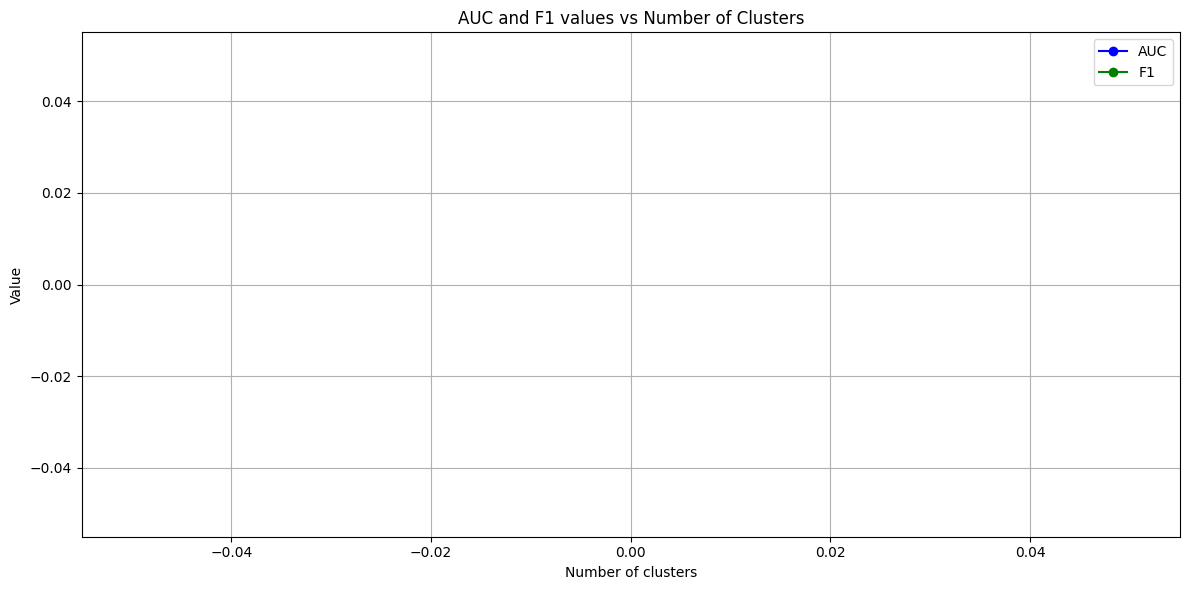

In [3]:
import matplotlib.pyplot as plt

# Extract the data from the results (excluding the header)
clusters = [row[0] for row in results[1:]]
auc_values = [row[1] for row in results[1:]]
f1_values = [row[2] for row in results[1:]]

# Plot AUC and F1 against the number of clusters
plt.figure(figsize=(12, 6))

plt.plot(clusters, auc_values, marker='o', label='AUC', color='blue')
plt.plot(clusters, f1_values, marker='o', label='F1', color='green')

# Annotate points
for i, txt in enumerate(auc_values):
    plt.annotate(f"{txt:.2f}", (clusters[i], auc_values[i]), fontsize=9, ha='right', va='bottom', color='blue')
for i, txt in enumerate(f1_values):
    plt.annotate(f"{txt:.2f}", (clusters[i], f1_values[i]), fontsize=9, ha='right', va='top', color='green')

plt.xlabel('Number of clusters')
plt.ylabel('Value')
plt.title('AUC and F1 values vs Number of Clusters')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

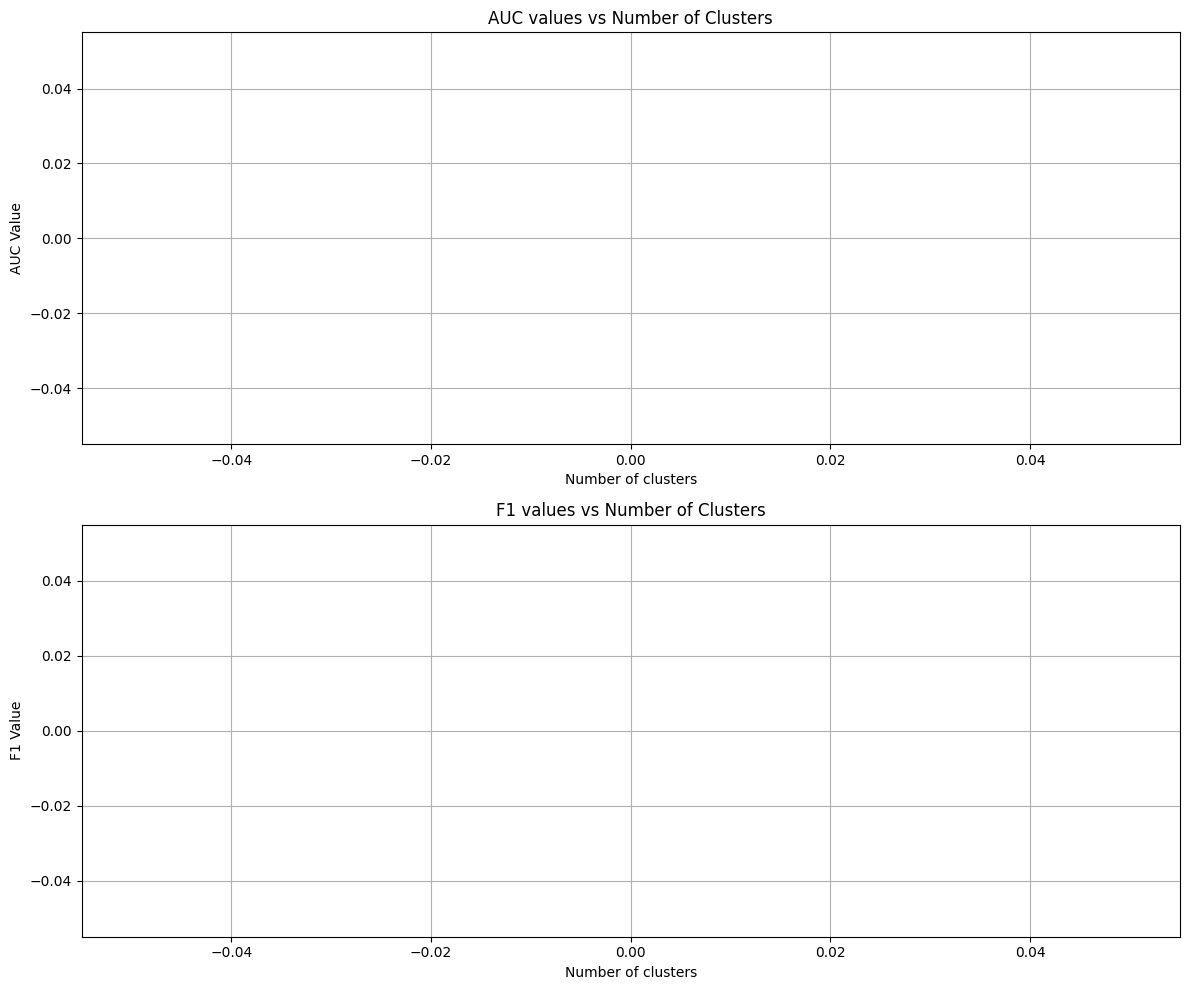

In [4]:
import matplotlib.pyplot as plt

# Extract the data from the results (excluding the header)
clusters = [row[0] for row in results[1:]]
auc_values = [row[1] for row in results[1:]]
f1_values = [row[2] for row in results[1:]]

plt.figure(figsize=(12, 10))

# Plot AUC
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st plot
plt.plot(clusters, auc_values, marker='o', color='blue')
for i, txt in enumerate(auc_values):
    plt.annotate(f"{txt:.2f}", (clusters[i], auc_values[i]), fontsize=9, ha='right', va='bottom', color='blue')
plt.xlabel('Number of clusters')
plt.ylabel('AUC Value')
plt.title('AUC values vs Number of Clusters')
plt.grid(True)

# Plot F1
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd plot
plt.plot(clusters, f1_values, marker='o', color='green')
for i, txt in enumerate(f1_values):
    plt.annotate(f"{txt:.2f}", (clusters[i], f1_values[i]), fontsize=9, ha='right', va='bottom', color='green')
plt.xlabel('Number of clusters')
plt.ylabel('F1 Value')
plt.title('F1 values vs Number of Clusters')
plt.grid(True)

plt.tight_layout()
plt.show()

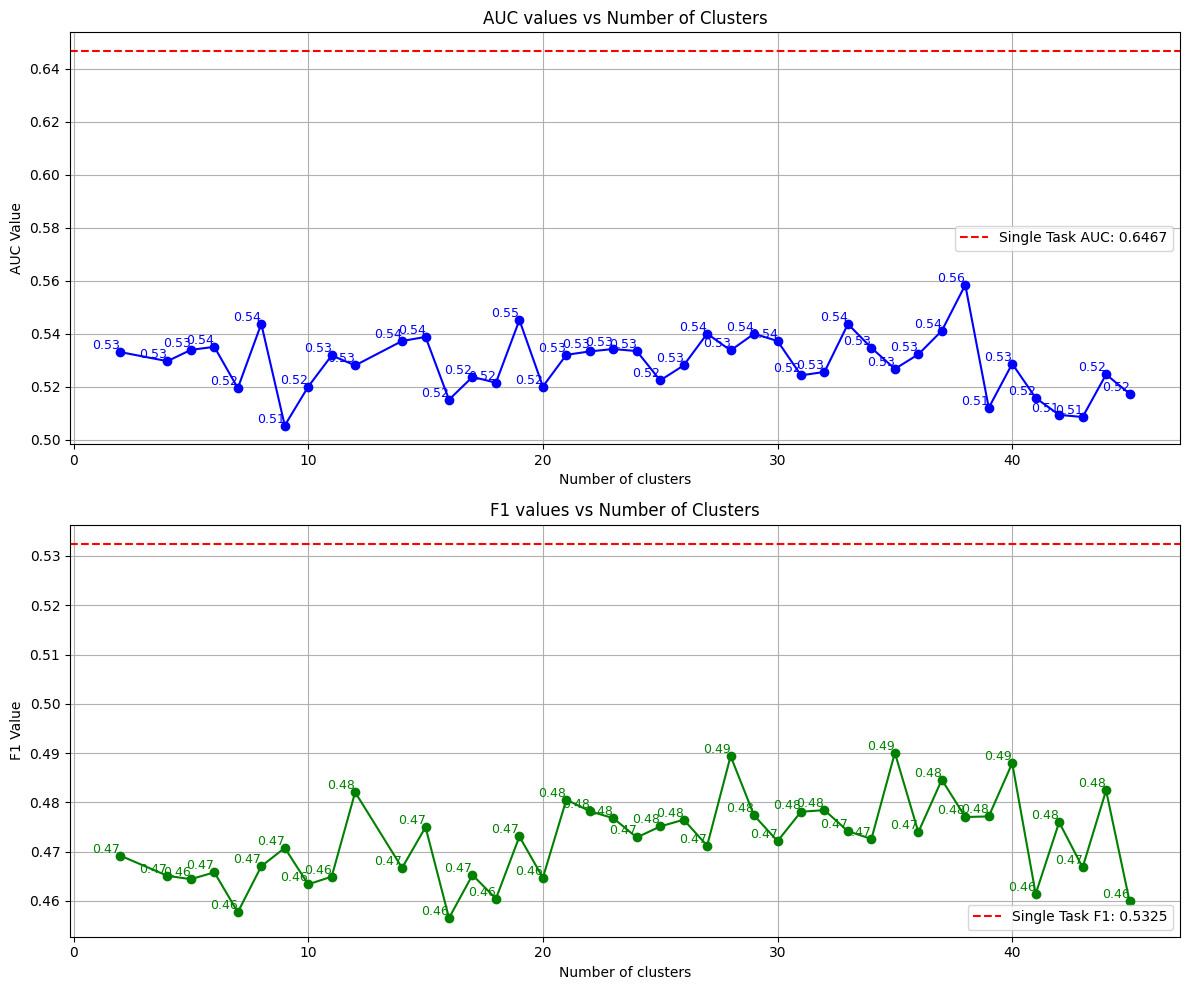

In [4]:
import matplotlib.pyplot as plt

# Extract the data from the results (excluding the header)
clusters = [row[0] for row in results[1:]]
auc_values = [row[1] for row in results[1:]]
f1_values = [row[2] for row in results[1:]]

# Define Single Task values
single_task_auc = 0.57
single_task_f1 = 0.48

plt.figure(figsize=(12, 10))

# Plot AUC
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st plot
plt.plot(clusters, auc_values, marker='o', color='blue')
plt.axhline(y=single_task_auc, color='r', linestyle='--', label=f'Single Task AUC: {single_task_auc:.4f}')
for i, txt in enumerate(auc_values):
    plt.annotate(f"{txt:.2f}", (clusters[i], auc_values[i]), fontsize=9, ha='right', va='bottom', color='blue')
plt.xlabel('Number of clusters')
plt.ylabel('AUC Value')
plt.title('AUC values vs Number of Clusters')
plt.legend()
plt.grid(True)

# Plot F1
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd plot
plt.plot(clusters, f1_values, marker='o', color='green')
plt.axhline(y=single_task_f1, color='r', linestyle='--', label=f'Single Task F1: {single_task_f1:.4f}')
for i, txt in enumerate(f1_values):
    plt.annotate(f"{txt:.2f}", (clusters[i], f1_values[i]), fontsize=9, ha='right', va='bottom', color='green')
plt.xlabel('Number of clusters')
plt.ylabel('F1 Value')
plt.title('F1 values vs Number of Clusters')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()